# Kmeans Clustering

## 1. Exploración y preprocesamiento de datos:

Cargamos los datos

Observando que los delimitadores están conformados por "\" hemos especificado el parametro "delimiter"

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
ds_path = "../data/Mall_Customers.csv"
df = pd.read_csv(ds_path)


Visualizamos la cabecera

In [45]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


Exploramos los datos

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Observamos los valores unicos de las variables categóricas

In [47]:
from utils.eda import get_categoric_columns
categoric_columns = get_categoric_columns(df)
for i in categoric_columns:
    print(i)
    print(df[i].unique())

Gender
['Male' 'Female']


Continuamos con la exploración de los datos

Visualizamos las últimas entradas

In [48]:
df.tail(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
190,191,Female,34,103,23
191,192,Female,32,103,69
192,193,Male,33,113,8
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


Verificamos los valores descriptivos

In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


Continuamos con el analisis

In [50]:
df.describe(include='object').T

,count,unique,top,freq
Gender,200,2,Female,112


### Identificación de valores nulos, duplicados y outliers

In [51]:
duplicated = df.duplicated().sum()
print(f"Registros duplicados en df: {duplicated}")

Registros duplicados en df: 0


No se observan valores duplicados

Ahora observaremos la columna ID

In [52]:
df['CustomerID'].duplicated().sum()

np.int64(0)

No se observan duplicados por lo tanto cada ID posee solo una entrada, por lo tanto podemos eliminar dicha columna ya que no aporta informacion importante al modelo

In [53]:
df.drop(['CustomerID'],axis=1,inplace=True)

Volvemos a verificar si existen valores duplicados ahora que eliminamos la columna ID. Ya que pueden existir entradas de diferentes clientes que sean identicas.

In [54]:
duplicated = df.duplicated().sum()
print(f"Registros duplicados en df: {duplicated}")

Registros duplicados en df: 0


Ahora buscamos valores nulos

In [55]:
from utils.eda import get_nulll_data_info
get_nulll_data_info(df)

,datos sin NAs en q,Na en q,Na en %
Gender,200,0,0.0
Age,200,0,0.0
Annual Income (k$),200,0,0.0
Spending Score (1-100),200,0,0.0


No se observan valores nulos

Observaremos distribucion de edades de los clientes

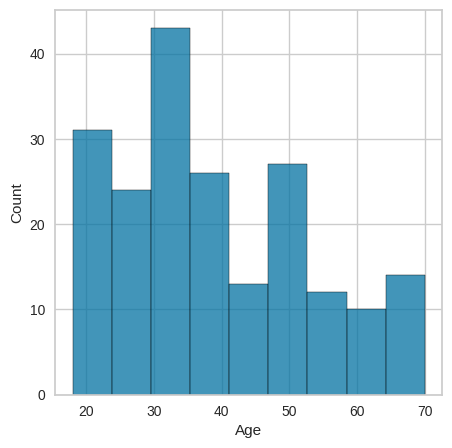

In [56]:
plt.figure(figsize=(5,5))
sns.histplot(df['Age'])
plt.show()

Agrupamos y volvemos a observar en un histograma con rangos etarios

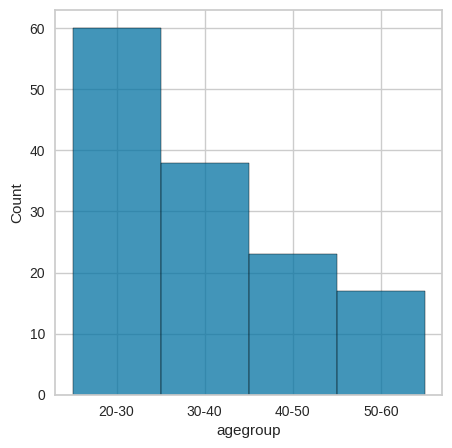

In [57]:
bins=[30,40,50,60,70,80,90]
labels = ['20-30','30-40','40-50','50-60','70-80','80+']

df['agegroup'] = pd.cut(df['Age'],bins=bins,labels=labels)
plt.figure(figsize=(5,5))
sns.histplot(df['agegroup'])
plt.show()

Generamos Histogramas para visualizar la distribucion

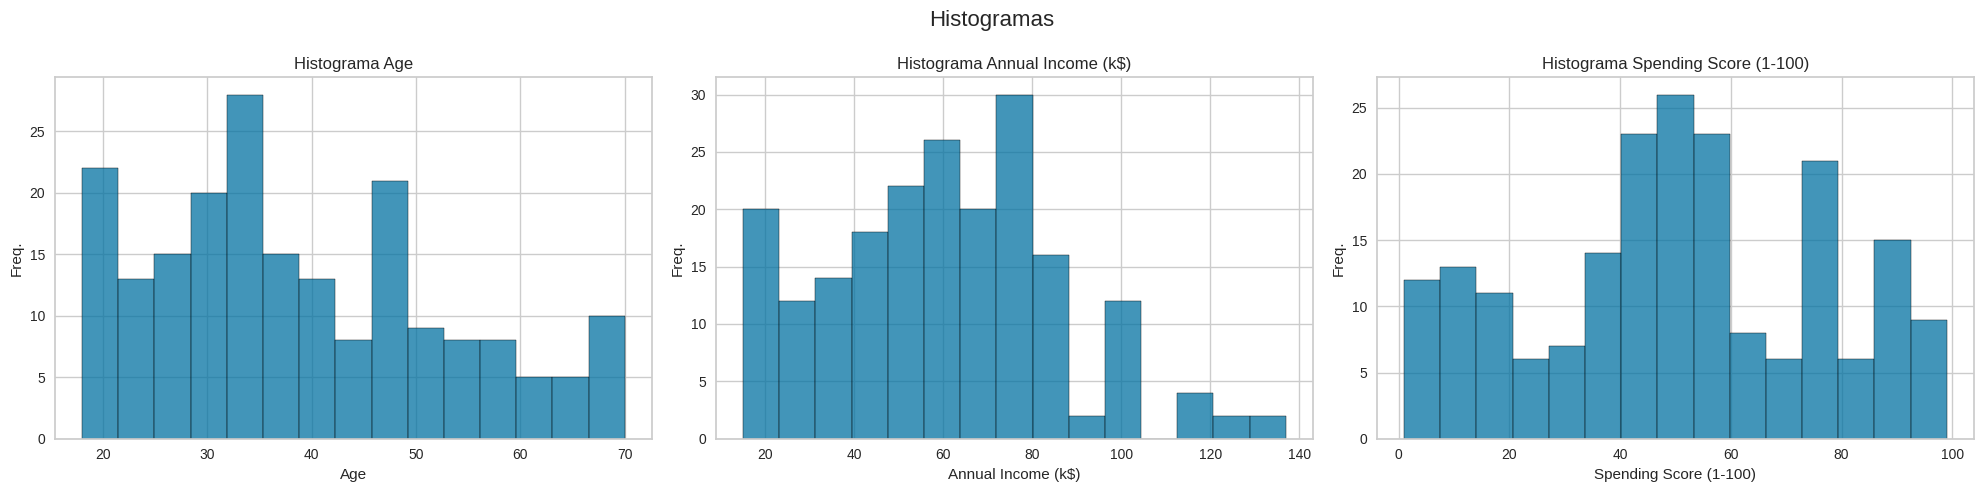

In [58]:
from utils.eda import graph_histogram, get_numeric_columns
graph_histogram(df, get_numeric_columns(df), bins=15, columns_number=3, figsize=(20, 5))

No se observa nada fuera de lo normal en los histogramas

Ahora verificamos los outliers

In [59]:
from utils.eda import get_outliers_data
get_outliers_data(df)

,Age,Annual Income (k$),Spending Score (1-100)
N° Outliers,0.000,2.00,0.000
% Outliers,0.000,1.00,0.000
Lim. mix,-1.625,-13.25,-22.625
Lim. max,79.375,132.75,130.375


Visualizamos las gráficas de cajas de nuestras columnas

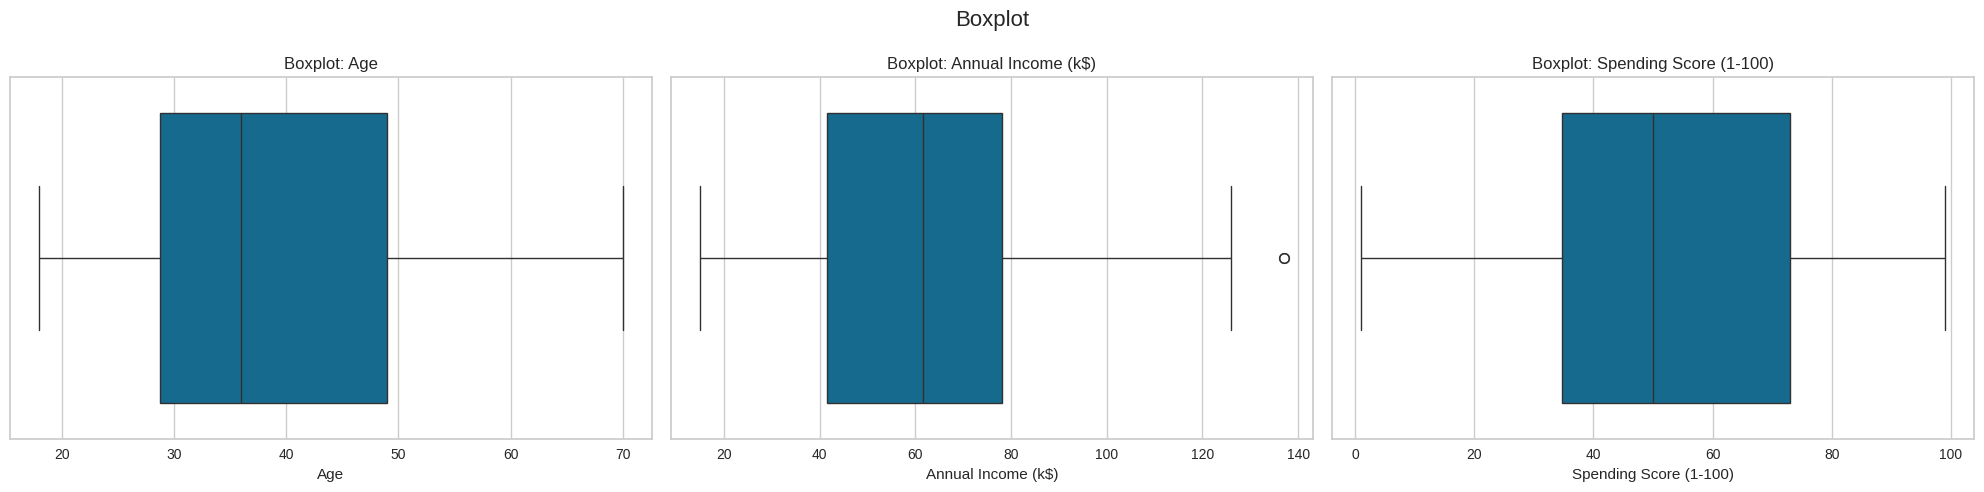

In [60]:
from utils.eda import graph_boxplot, get_numeric_columns
graph_boxplot(df, columns=get_numeric_columns(df), figsize=(20, 5))

Observamos algunos outliers

Ahora veremos las caracteristicas descriptivas de las variables númericas

In [61]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [62]:
from utils.eda import get_descriptive_statistics
get_descriptive_statistics(df)

,Age,Annual Income (k$),Spending Score (1-100)
min,18.000000,15.000000,1.000000
max,70.000000,137.000000,99.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
median,36.000000,61.500000,50.000000
variation_coefficient,0.359563,0.433698,0.514413


Veremos las correlaciones entre las caracteristicas

In [63]:
from utils.eda import get_numeric_columns
numeric_columns = get_numeric_columns(df)
corr_matrix = df[numeric_columns].corr(method="pearson")
spearmann = df[numeric_columns].corr(method="spearman")
kendall = df[numeric_columns].corr(method="kendall")
corr_matrix

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


Ahora graficamos el mapa de calor de las correlaciones

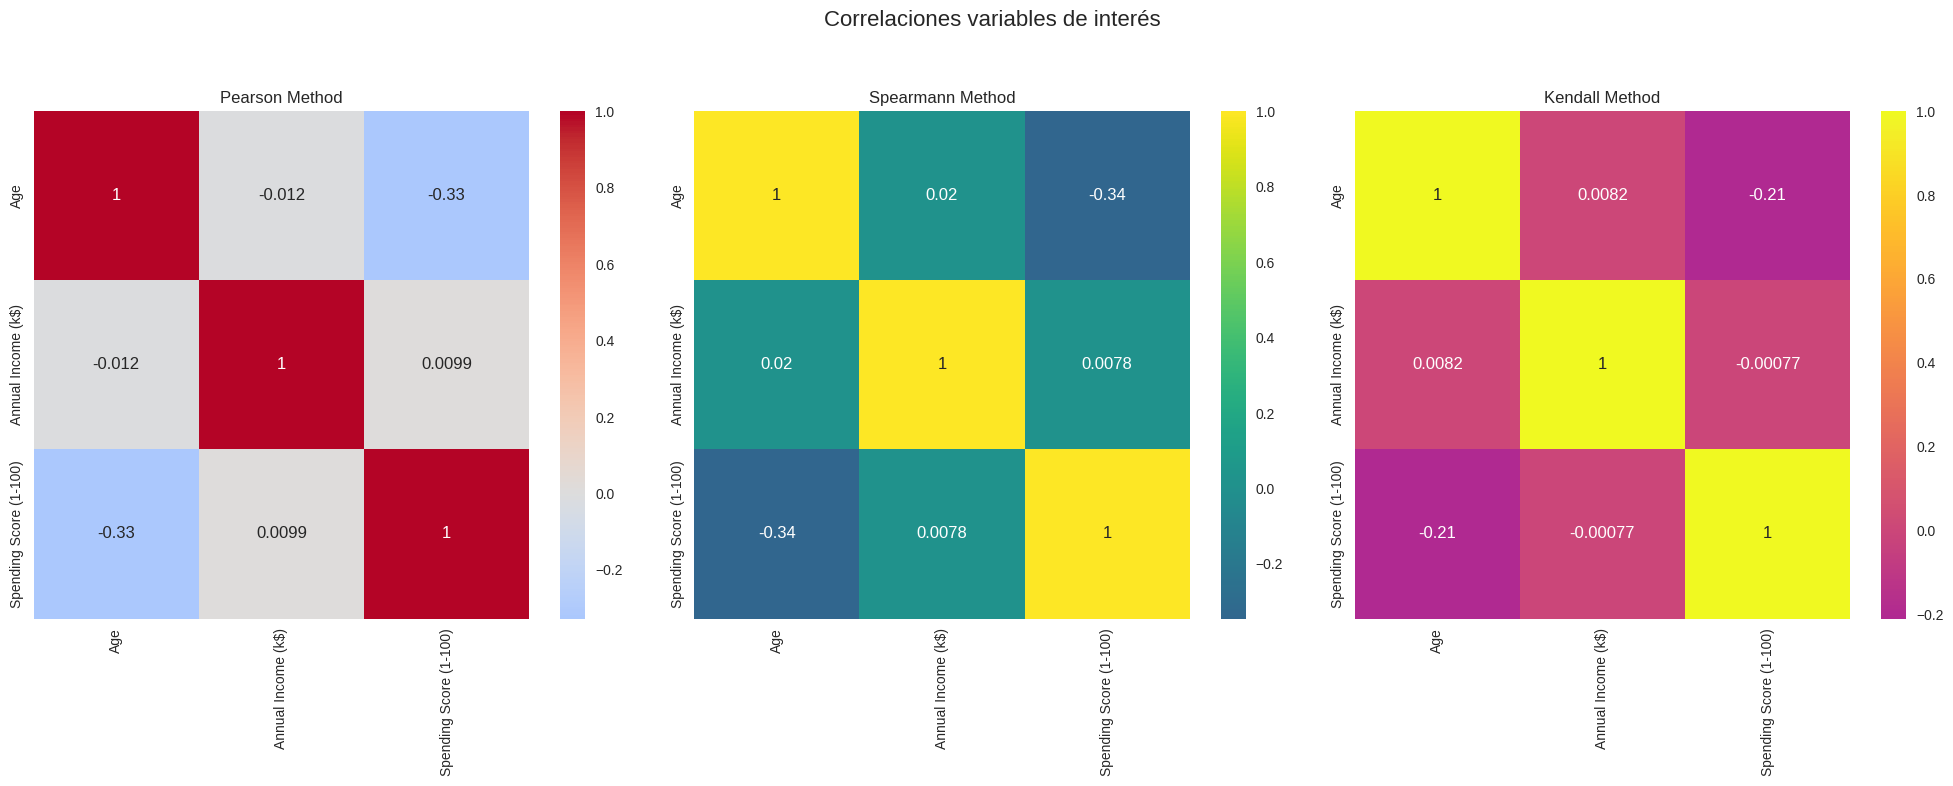

In [64]:
from utils.eda import graph_correlations
graph_correlations(corr_matrix, spearmann, kendall, "Correlaciones variables de interés", figsize= (20,8),num_columns=3)

Observamos que no existen correlaciones importantes entre las columnas


### Preprocesamos los datos

Aplicamos un LabelEncoder a las columnas de tipo object

In [65]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
df = df.drop(['agegroup'],axis=1)
#Converting Categorical variables into numrerical
LE = LabelEncoder()
for i in df:
    if df[i].dtype=='object':
        df[i] = LE.fit_transform(df[i])

In [66]:
#Scale Values
SS = StandardScaler()
scaled_data = pd.DataFrame(SS.fit_transform(df.values),index=df.index,columns=df.columns)
scaled_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


Seleccionamos los features

In [67]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

Implementamos kmeans

In [68]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Cant. de clusters 3

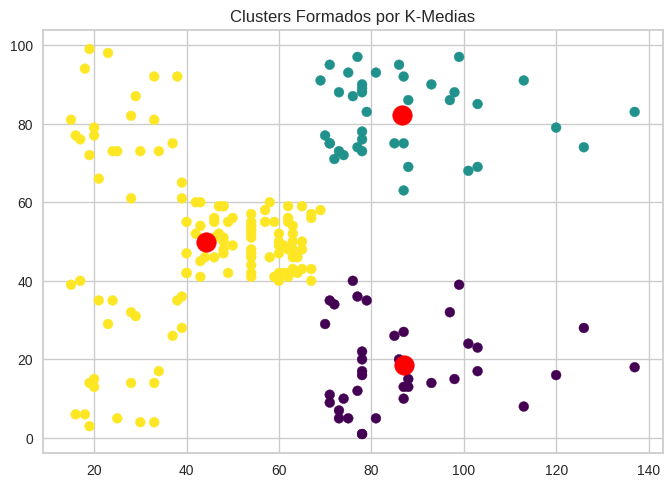

In [69]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)


# Visualizar los clusters resultantes
plt.scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red')
plt.title("Clusters Formados por K-Medias")
plt.show()

Cantidad de clusters 4

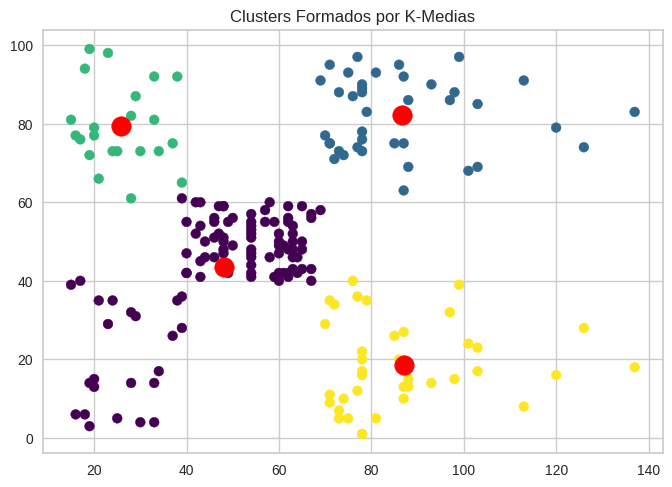

In [70]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)


# Visualizar los clusters resultantes
plt.scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red')
plt.title("Clusters Formados por K-Medias")
plt.show()

Cant. de clusters 5

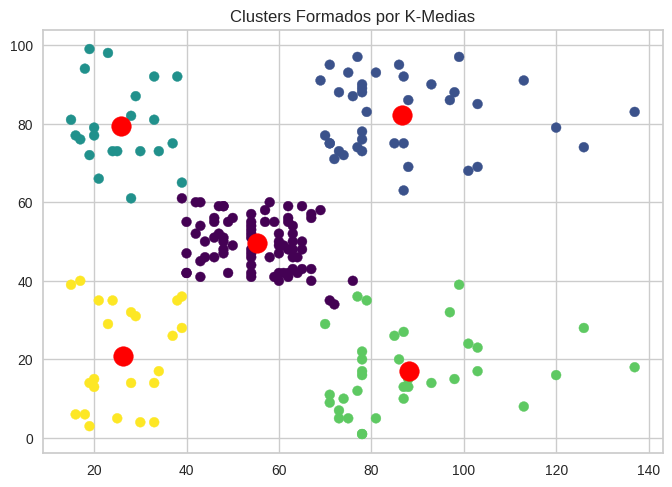

In [71]:

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)


# Visualizar los clusters resultantes
plt.scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red')
plt.title("Clusters Formados por K-Medias")
plt.show()

Visualizamos

Elbow

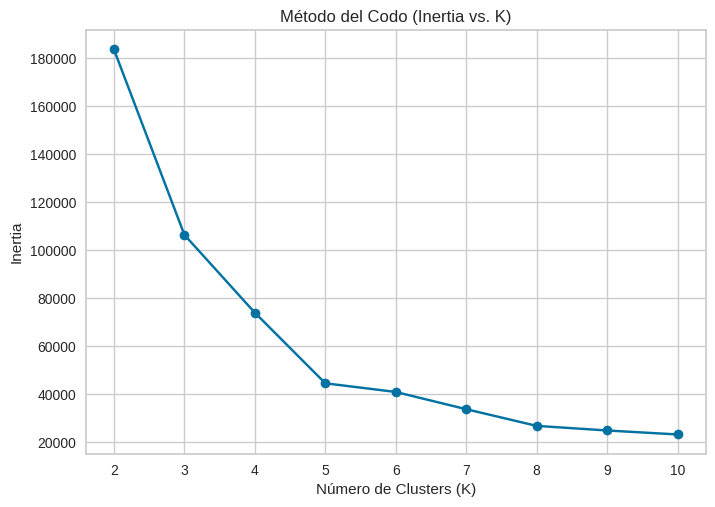

In [72]:
k_values = range(2, 11)

inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)


plt.plot(k_values, inertia, marker='o')
plt.title("Método del Codo (Inertia vs. K)")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Inertia")
plt.show()


Silhoette

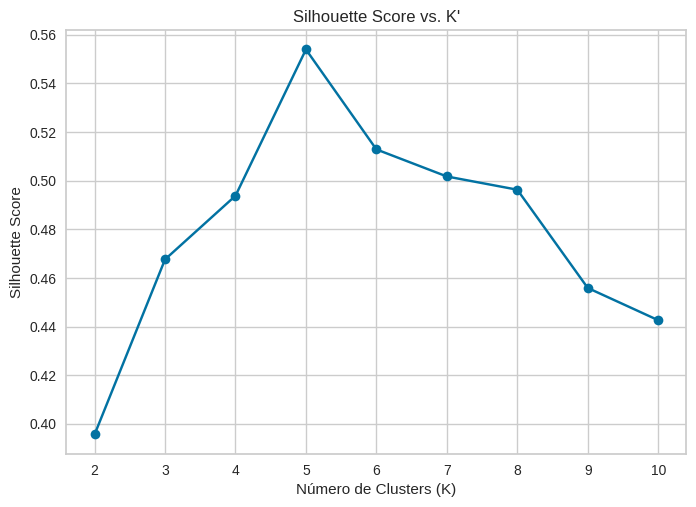

In [73]:
sil_scores = []
k_values = range(2, 11)


for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sil_scores.append(silhouette_score(X, kmeans.labels_))


plt.plot(k_values, sil_scores, marker='o')
plt.title("Silhouette Score vs. K'")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

Interpretacion

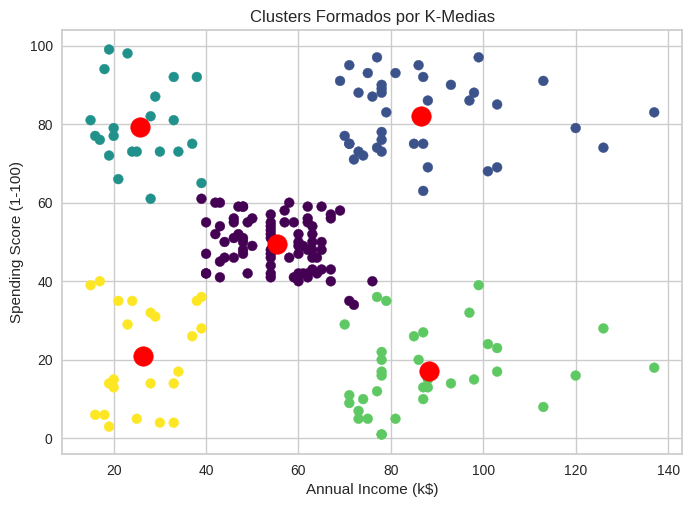

In [85]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)


# Visualizar los clusters resultantes
plt.scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red')
plt.title("Clusters Formados por K-Medias")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

- Cluster 1: Este grupo incluye clientes con ingresos anuales bajos, alrededor de 0 a 40k, y un Spending Score bajo. El rango de Spending Score va de 0 a 40, lo que evidencia una alta dispersión en este grupo. En general, los clientes de este cluster tienden a tener un Spending Score considerablemente reducido.

- Cluster 2: Este grupo también corresponde a clientes con ingresos anuales bajos, entre 0 y 40k, pero con un Spending Score elevado. Su rango de Spending Score está entre 60 y 100, lo que demuestra una amplia dispersión, similar al Cluster 1. No obstante, estos clientes tienen, en promedio, un Spending Score relativamente alto.

- Cluster 3: Este cluster agrupa a clientes con ingresos anuales medios, aproximadamente entre 40k y 80k. En este caso, el Spending Score es más homogéneo, con un rango reducido de 40 a 60. Esto sugiere que estos clientes tienen un comportamiento de gasto más consistente, sin valores extremos ni muy altos ni muy bajos.

- Cluster 4: Aquí se agrupan clientes con ingresos altos, entre 75k y 140k. Inicialmente, el Spending Score muestra una gran dispersión, con valores que oscilan entre 0 y 40. Además, en los niveles de ingresos más altos dentro de este grupo, se observan posibles valores atípicos (outliers) que merecen atención.

- Cluster 5: Similar al Cluster 4, este grupo también incluye clientes con ingresos altos, entre 75k y 140k. Sin embargo, estos clientes se caracterizan por tener un Spending Score elevado, con un rango de 60 a 100. A pesar de esto, se identifican outliers que presentan Spending Scores más bajos en comparación con el promedio del grupo.

## Resultados


- Cluster Amarillo (Bajo ingreso, bajo gasto):

- Clientes con ingresos anuales bajos (entre 0 y 40k) y Spending Score bajo (0-40).
Estos clientes tienen un poder adquisitivo limitado y gastan poco, siendo probablemente los clientes menos activos.
Cluster Turquesa (Bajo ingreso, alto gasto):

- Clientes con ingresos anuales bajos (0-40k) pero Spending Score alto (60-100).
A pesar de tener ingresos bajos, estos clientes muestran altos niveles de gasto, lo que puede representar una oportunidad para estrategias específicas.
Cluster Morado (Ingreso medio, gasto moderado):

- Clientes con ingresos anuales moderados (aproximadamente 40k a 60k) y un Spending Score intermedio (40-60).
Estos clientes tienen un patrón de gasto más equilibrado y homogéneo.
Cluster Verde (Alto ingreso, bajo gasto):

- Clientes con ingresos altos (75k a 140k) y Spending Score bajo (0-40).
A pesar de tener altos ingresos, estos clientes gastan muy poco, lo que podría indicar una falta de interés en la oferta actual o un comportamiento de ahorro.
Cluster Azul (Alto ingreso, alto gasto):

- Clientes con ingresos altos (75k a 140k) y Spending Score alto (60-100).
Este grupo representa a los mejores clientes: tienen alta capacidad adquisitiva y alto nivel de gasto, lo que los convierte en un segmento clave para la empresa

Oportunidades Estratégicas:
- Cluster Amarillo: Explorar estrategias para aumentar el Spending Score, como promociones dirigidas o productos accesibles.
- Cluster Turquesa: Mantener el interés de estos clientes con ofertas personalizadas y retenerlos con programas de fidelización.
- Cluster Verde: Identificar por qué gastan tan poco y ofrecer productos o servicios que los motiven a consumir más.
- Cluster Azul: Priorizar y retener a estos clientes con servicios premium o programas exclusivos.
